In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                   ('bird', 'Psittaciformes', 24.0),
                   ('mammal', 'Carnivora', 80.2),
                   ('mammal', 'Primates', np.nan),
                   ('mammal', 'Carnivora', 58)],
                  index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                  columns=('class', 'order', 'max_speed'))

df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [9]:
grouped = df.groupby('class')
grouped.sum()

,max_speed
class,
bird,413.0
mammal,138.2


In [12]:
grouped = df.groupby('class', axis='columns')
grouped.sum()

class
falcon
parrot
lion
monkey
leopard


In [13]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.192842,-0.115645
1,bar,one,-0.190050,-0.998741
2,foo,two,-0.061615,1.135643
3,bar,three,-0.701861,-0.529593
4,foo,two,-1.086499,0.814720
5,bar,two,-1.246321,-0.982226
6,foo,one,1.188177,0.139812
7,foo,three,2.336295,0.755605


In [15]:
df2 = df.set_index(['A','B'])
print(df2)
# Group by all indices except index B
grouped = df2.groupby(level=df2.index.names.difference(['B']))
grouped.sum()

                  C         D
A   B                        
foo one    1.192842 -0.115645
bar one   -0.190050 -0.998741
foo two   -0.061615  1.135643
bar three -0.701861 -0.529593
foo two   -1.086499  0.814720
bar two   -1.246321 -0.982226
foo one    1.188177  0.139812
    three  2.336295  0.755605


,C,D
A,,
bar,-2.138232,-2.510560
foo,3.569199,2.730134


In [19]:
# Using a function
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

grouped = df.groupby(get_letter_type, axis=1)
grouped.sum()

,consonant,vowel
0,1.077197,foo
1,-1.188791,bar
2,1.074028,foo
3,-1.231455,bar
4,-0.271780,foo
5,-2.228547,bar
6,1.327989,foo
7,3.091899,foo


In [21]:
# Grouping by Index
lst = [1,2,3,1,2,3]
s = pd.Series([1,2,3,10,20,30], lst)
print(s)

grouped = s.groupby(level=0)

print(grouped.first())
print(grouped.last())
print(grouped.sum())

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64
1    1
2    2
3    3
dtype: int64
1    10
2    20
3    30
dtype: int64
1    11
2    22
3    33
dtype: int64


In [26]:
# Getting a specific group
df3 = pd.DataFrame({'X': ['A', 'B', 'A', 'B'], 'Y': [1, 4, 3, 2]})
grouped = df3.groupby('X')
grouped.get_group('A')

,X,Y
0,A,1
2,A,3


In [29]:
# The groups attribute
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [30]:
# Grouping by both columns and indices
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

df = pd.DataFrame({'A': [1, 1, 1, 1, 2, 2, 3, 3],
                   'B': np.arange(8)},
                  index=index)

df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [32]:
df.groupby([pd.Grouper(level='second'), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [33]:
# Another way
df.groupby(['second','A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [38]:
# Column selection in groupby
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

grouped = df.groupby(['A'])
grouped_C = grouped['C']
grouped_C.sum()

A
bar   -2.060762
foo    0.335417
Name: C, dtype: float64

In [40]:
# Equivalent to
df['C'].groupby(df['A']).sum()

A
bar   -2.060762
foo    0.335417
Name: C, dtype: float64

In [42]:
# Iterating through groups
print(grouped.groups)

for name, group in grouped:
    print(name)
    print(group)

{'bar': Int64Index([1, 3, 5], dtype='int64'), 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}
bar
     A      B         C         D
1  bar    one -0.170681  0.523492
3  bar  three -0.654688  0.478559
5  bar    two -1.235392 -0.284960
foo
     A      B         C         D
0  foo    one  0.622616  0.805073
2  foo    two  1.418191 -0.004489
4  foo    two -0.897059 -0.401003
6  foo    one  0.756831  0.240300
7  foo  three -1.565161  1.366454


In [43]:
# Getting an object grouped on multiple columns
df.groupby(['A', 'B']).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,-0.170681,0.523492


In [46]:
# Using the aggregation method
grouped.aggregate(np.sum)

,C,D
A,,
bar,-2.060762,0.717091
foo,0.335417,2.006335


In [47]:
# Preventing groups from being the index
grouped = df.groupby(['A', 'B'], as_index=False)
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,-0.170681,0.523492
1,bar,three,-0.654688,0.478559
2,bar,two,-1.235392,-0.284960
3,foo,one,1.379447,1.045373
4,foo,three,-1.565161,1.366454
5,foo,two,0.521131,-0.405492


In [49]:
# Find the sizes of each group
print(grouped.size())
print(len(grouped)) # Returns the number of groups

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64
6


In [51]:
# Descriptive information
grouped.describe()

C                                                                        \
  count      mean       std       min       25%       50%       75%       max   
0   1.0 -0.170681       NaN -0.170681 -0.170681 -0.170681 -0.170681 -0.170681   
1   1.0 -0.654688       NaN -0.654688 -0.654688 -0.654688 -0.654688 -0.654688   
2   1.0 -1.235392       NaN -1.235392 -1.235392 -1.235392 -1.235392 -1.235392   
3   2.0  0.689723  0.094905  0.622616  0.656170  0.689723  0.723277  0.756831   
4   1.0 -1.565161       NaN -1.565161 -1.565161 -1.565161 -1.565161 -1.565161   
5   2.0  0.260566  1.637129 -0.897059 -0.318247  0.260566  0.839378  1.418191   

      D                                                                        
  count      mean       std       min       25%       50%       75%       max  
0   1.0  0.523492       NaN  0.523492  0.523492  0.523492  0.523492  0.523492  
1   1.0  0.478559       NaN  0.478559  0.478559  0.478559  0.478559  0.478559  
2   1.0 -0.284960       NaN -0.284960 -0.284960 -0.284960 -0.284960 -0.284960  
3   2.0  0.522687  0.399354  0.240300  0.381493  0.522687  0.663880  0.805073  
4   1.0  1.366454       NaN  1.366454  1.366454  1.366454  1.366454  1.366454  
5   2.0 -0.202746  0.280378 -0.401003 -0.301874 -0.202746 -0.103617 -0.004489

In [52]:
# Applying several functions
grouped = df.groupby('A')

grouped['C'].aggregate([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,-2.060762,-0.686921,0.533087
foo,0.335417,0.067083,1.245356


In [53]:
grouped.agg([np.sum, np.mean, np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -2.060762 -0.686921  0.533087  0.717091  0.239030  0.454345
foo  0.335417  0.067083  1.245356  2.006335  0.401267  0.694411

In [55]:
# Rename the column outputs
grouped['C'].aggregate([np.sum, np.mean, np.std]).rename(columns =
{'sum':'foo', 'mean':'bar','std':'baz'})

,foo,bar,baz
A,,,
bar,-2.060762,-0.686921,0.533087
foo,0.335417,0.067083,1.245356


In [56]:
# Applying multiple lambdas
grouped['C'].agg([lambda x: x.max() - x.min(),
                  lambda x: x.median() - x.mean()])
# Results in an error that is contrary to the documentation

SpecificationError: Function names must be unique, found multiple named <lambda>

In [57]:
# Applying different aggregations depending on column
grouped.agg({'C':np.sum, 'D':lambda x : np.std(x, ddof=1)})

,C,D
A,,
bar,-2.060762,0.454345
foo,0.335417,0.694411


In [58]:
# Applying transformations to the data
index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100, min_periods=100).mean().dropna()

transformed = ts.groupby(lambda x:x.year).transform((lambda x: (x - x.mean())/x.std()))

In [63]:
# 0 mean expected and std = 1
grouped_trans = transformed.groupby(lambda x: x.year)

print(grouped_trans.mean()) # Very small mean approx 0
grouped_trans.std()

2000   -2.345385e-15
2001   -1.383977e-17
2002    6.949916e-16
dtype: float64


2000    1.0
2001    1.0
2002    1.0
dtype: float64

In [66]:
# Replacing missing data with group mean
data_df = pd.DataFrame(np.random.randn(1000,4), columns={'A','B','C','D'})

In [67]:
# Inserting some missing data
data_df.loc[np.random.randint(0,1000,100),['A','B','C','D']] = np.nan
data_df

,A,B,D,C
0,NaN,NaN,NaN,NaN
1,0.096289,-1.664366,-0.460131,1.964377
2,-0.938399,-0.608344,-0.168605,1.084520
3,NaN,NaN,NaN,NaN
4,1.146102,2.224554,-0.478803,1.079128
5,-0.325405,0.576177,-0.158570,0.144036
6,-1.155468,0.856557,-0.084638,1.100297
7,-0.190262,0.486385,-0.490147,0.429535
8,-1.283615,-0.479682,0.355457,0.511536
9,0.988681,-1.103929,1.001645,0.543845


In [68]:
countries = np.array(['US', 'UK', 'GR', 'JP'])
key = countries[np.random.randint(0, 4, 1000)]
grouped = data_df.groupby(key)
grouped.count()

,A,B,D,C
GR,224,224,224,224
JP,216,216,216,216
UK,223,223,223,223
US,243,243,243,243


In [69]:
# Replacing missing with group mean with transform
transformed = grouped.transform(lambda x: x.fillna(x.mean()))
grouped_trans = transformed.groupby(key)

print(grouped.mean())
print(grouped_trans.mean())
print(grouped.count())
print(grouped_trans.count())
print(grouped_trans.size())

           A         B         D         C
GR  0.016123 -0.028456 -0.006047 -0.086520
JP -0.028927 -0.010760  0.008423 -0.085003
UK -0.007795  0.020636 -0.082581 -0.077240
US -0.002785  0.029553 -0.101354 -0.031000
           A         B         D         C
GR  0.016123 -0.028456 -0.006047 -0.086520
JP -0.028927 -0.010760  0.008423 -0.085003
UK -0.007795  0.020636 -0.082581 -0.077240
US -0.002785  0.029553 -0.101354 -0.031000
      A    B    D    C
GR  224  224  224  224
JP  216  216  216  216
UK  223  223  223  223
US  243  243  243  243
      A    B    D    C
GR  251  251  251  251
JP  241  241  241  241
UK  245  245  245  245
US  263  263  263  263
GR    251
JP    241
UK    245
US    263
dtype: int64


In [74]:
# Incorrect way!! This way uses column means without considering group means
non_transformed = data_df.fillna(data_df.mean())
non_transformed = non_transformed.groupby(key)

print(non_transformed.mean())
print(non_transformed.count())
print(non_transformed.size())

           A         B         D         C
GR  0.013789 -0.025029 -0.010452 -0.084634
JP -0.026505 -0.009291  0.002674 -0.083342
UK -0.007596  0.019089 -0.079385 -0.076499
US -0.002997  0.027564 -0.097221 -0.033889
      A    B    D    C
GR  251  251  251  251
JP  241  241  241  241
UK  245  245  245  245
US  263  263  263  263
GR    251
JP    241
UK    245
US    263
dtype: int64


In [75]:
# Correct way, though not necessarily better
non_transformed = data_df.fillna(data_df.groupby(key).mean())
non_transformed = non_transformed.groupby(key)

print(non_transformed.mean())
print(non_transformed.count())
print(non_transformed.size())

           A         B         D         C
GR  0.016123 -0.028456 -0.006047 -0.086520
JP -0.028927 -0.010760  0.008423 -0.085003
UK -0.007795  0.020636 -0.082581 -0.077240
US -0.002785  0.029553 -0.101354 -0.031000
      A    B    D    C
GR  224  224  224  224
JP  216  216  216  216
UK  223  223  223  223
US  243  243  243  243
GR    251
JP    241
UK    245
US    263
dtype: int64


In [80]:
# Filtering Data
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf.groupby(sf).filter(lambda x:x.sum() > 2) 
# Returns elements of groups where the sum is > 2

3    3
4    3
5    3
dtype: int64

In [81]:
# Filter out groups with 2 or less elements
dff = pd.DataFrame({'A': np.arange(8), 'B': list('aabbbbcc')})
dff.groupby('B').filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [82]:
# Alternatively they can be marked as NaN
dff.groupby('B').filter(lambda x: len(x) > 2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [83]:
# nlargerst
s = pd.Series([9, 8, 7, 5, 19, 1, 4.2, 3.3])
g = pd.Series(list('abababab'))
gb = s.groupby(g)

gb.nlargest(3)

a  4    19.0
   0     9.0
   2     7.0
b  1     8.0
   3     5.0
   7     3.3
dtype: float64

In [84]:
# nsmallest
gb.nsmallest(3)

a  6    4.2
   2    7.0
   0    9.0
b  5    1.0
   7    3.3
   3    5.0
dtype: float64

In [88]:
#using apply for functions that neither aggregate or transform
grouped = df.groupby('A')

# Could be done with grouped.describe()

grouped['C'].apply(lambda x:x.describe())

A         
bar  count    3.000000
     mean    -0.686921
     std      0.533087
     min     -1.235392
     25%     -0.945040
     50%     -0.654688
     75%     -0.412685
     max     -0.170681
foo  count    5.000000
     mean     0.067083
     std      1.245356
     min     -1.565161
     25%     -0.897059
     50%      0.622616
     75%      0.756831
     max      1.418191
Name: C, dtype: float64

In [89]:
# With a function
grouped = df.groupby('A')['C']

def f(group):
    return pd.DataFrame({'original': group,
                        'demeaned':group - group.mean()})

grouped.apply(f)

,original,demeaned
0,0.622616,0.555532
1,-0.170681,0.516239
2,1.418191,1.351107
3,-0.654688,0.032232
4,-0.897059,-0.964143
5,-1.235392,-0.548472
6,0.756831,0.689748
7,-1.565161,-1.632244


In [92]:
# For categoricals
pd.Series([1, 1, 1]).groupby(pd.Categorical(['a','a','a'],
                                            categories=['a','b']),
                             observed=False).count()

a    3
b    0
dtype: int64

In [93]:
# Using grouper for local control
import datetime

df = pd.DataFrame({'Branch': 'A A A A A A A B'.split(),
                    'Buyer': 'Carl Mark Carl Carl Joe Joe Joe Carl'.split(),
                    'Quantity': [1, 3, 5, 1, 8, 1, 9, 3],
                    'Date': [
                        datetime.datetime(2013, 1, 1, 13, 0),
                        datetime.datetime(2013, 1, 1, 13, 5),
                        datetime.datetime(2013, 10, 1, 20, 0),
                        datetime.datetime(2013, 10, 2, 10, 0),
                        datetime.datetime(2013, 10, 1, 20, 0),
                        datetime.datetime(2013, 10, 2, 10, 0),
                        datetime.datetime(2013, 12, 2, 12, 0),
                        datetime.datetime(2013, 12, 2, 14, 0)]
                    })


df

,Branch,Buyer,Quantity,Date
0,A,Carl,1,2013-01-01 13:00:00
1,A,Mark,3,2013-01-01 13:05:00
2,A,Carl,5,2013-10-01 20:00:00
3,A,Carl,1,2013-10-02 10:00:00
4,A,Joe,8,2013-10-01 20:00:00
5,A,Joe,1,2013-10-02 10:00:00
6,A,Joe,9,2013-12-02 12:00:00
7,B,Carl,3,2013-12-02 14:00:00


In [96]:
df.groupby([pd.Grouper(freq='1M', key='Date'), 'Buyer']).sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

In [97]:
# Taking the nth row of each group
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=['A', 'B'])
df.groupby('A').nth(0)

,B
A,
1,NaN
5,6.0


In [99]:
df.groupby('A').nth(-1)

,B
A,
1,4.0
5,6.0


In [101]:
df.groupby('A').nth(1) # Group B has no row 1

,B
A,
1,4.0


In [102]:
# Get nth non-null
df.groupby('A').nth(0, dropna='any')

,B
A,
1,4.0
5,6.0


In [104]:
df.groupby('A').first()

,B
A,
1,4.0
5,6.0


In [105]:
df.groupby('A').last()

,B
A,
1,4.0
5,6.0


A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

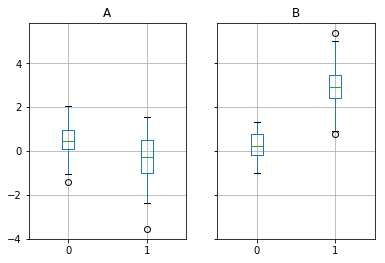

In [110]:
# Plotting
np.random.seed(1234)

df = pd.DataFrame(np.random.randn(50, 2))

df['g'] = np.random.choice(['A', 'B'], size=50)

df.loc[df['g'] == 'B', 1] += 3

df.groupby('g').boxplot()

In [111]:
# Returning a series to propagate names
df = pd.DataFrame({'a': [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
                   'b': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
                   'c': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
                   'd': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]})

df

,a,b,c,d
0,0,0,1,0
1,0,0,0,0
2,0,1,1,0
3,0,1,0,1
4,1,0,1,0
5,1,0,0,0
6,1,1,1,0
7,1,1,0,1
8,2,0,1,0
9,2,0,0,0


In [112]:
def compute_metrics(x):
    result = {'b_sum':x['b'].sum(), 'c_mean':x['c'].mean()}
    return pd.Series(result, name='metrics')

In [116]:
results = df.groupby('a').apply(compute_metrics)
results

metrics,b_sum,c_mean
a,,
0,2.0,0.5
1,2.0,0.5
2,2.0,0.5


In [119]:
results.stack()

a  metrics
0  b_sum      2.0
   c_mean     0.5
1  b_sum      2.0
   c_mean     0.5
2  b_sum      2.0
   c_mean     0.5
dtype: float64